#Regresión polinomial
Exsiten ocasiones en las que los datos no se acoplan al modelo lineal. Entonces, el modelo de mínimos cuadrados se puede extender al ajuste de datos con un polinomio de grado superior.

#Regresión polinomial de 2° grado
Suponga que se ajusta a un polinomio de 2° grado o cuadrático:
\begin{equation}
y=a_0+a_1x+a_2x^2+e
\end{equation}
en este caso la suma de los cuadrados de los residuos es
\begin{equation}
S_r=\sum_{i=1}^{n}(y_i-a_0-a_1-a_2x_i^2)^2
\end{equation}
Al seguir el procedimiento de la regresión lineal, se obtiene la derivada parcial con respecto a uno de los coeficientes desconicidos del polinomio
\begin{eqnarray}
\frac{\partial S_r}{\partial a_0}=-2\sum_{i=1}^{n}(y_i-a_0-a_1-a_2x_i^2)
\\\frac{\partial S_r}{\partial a_1}=-2\sum_{i=1}^{n}x_i(y_i-a_0-a_1-a_2x_i^2)
\\\frac{\partial S_r}{\partial a_2}=-2\sum_{i=1}^{n}x_i^2(y_i-a_0-a_1-a_2x_i^2)
\nonumber
\end{eqnarray}
estas ecuaciones se igualan a cero y se reordenan para desarrollar el siguiente conjunto de ecuaciones
\begin{eqnarray}
(n)a_0+(\sum x_i)a_1+(\sum x_i^2)a_2=\sum y_i
\\(\sum x_i)a_0+(\sum x_i^2)a_1+(\sum x_i^3)a_2=\sum x_iy_i
\\(\sum x_i^2)a_0+(\sum x_i^3)a_1+(\sum x_i^4)a_2=\sum x_i^2y_i
\end{eqnarray}
este sistema de ecuaciones se resuelve para encontrar las constantes $a_0$, $a_1$ y $a_2$.

#Ejemplo:

In [2]:
#Código hecho por: Diana Ailed Hernández Bustos
import numpy as np
from math import*
import matplotlib.pyplot as plt
# Datos:
x = np.array([0, 4, 8, 12, 16, 20])
y = np.array([67e6, 84e6, 98e6, 125e6, 149e6, 185e6])
n = len(x)
o = 2 # Orden del polinomio

In [3]:
#Definiendo las funciones:
def piv(a, i):
    for s in range (0, m):
        if a[i+s, i] !=0:
            d = i+s
            break
            #print(d)
    return d

def gauss(a, m):
    for i in range (0, m-1):
        for k in range (i+1, m):
            #Condición del pivoteo:
            if a[i, i] == 0:
                d = piv(a, i)
                for p in range (0, m+1):
                    prueba[p] = a[i,p]
                    a[i, p] = a[d, p]
                    a[d, p]= prueba[p]

            #Después de haber hecho el pivoteo (en caso de que se requiera) se continúa con Gauss:
            factor = a[k, i]/ a[i, i]
            a[k,:]= a[k,:]-a[i,:]*factor

    #Para escribir los resultados:
    x = np.zeros([m])
    for i in range (m-1, -1, -1):
        if i == (m-1):
            x[i] = a[i, m] / a[i, i]

        else:
            sumatoria=0
            for r in range(0, m):
                sumatoria = sumatoria + (a[i,r] * x[r])
            x[i]=(a[i, m]-sumatoria)/a[i,i]
    return(x)


DATOS: 
    x prom         y prom         Suma x         Suma y     
    10.000     118,000,000.000    60.000     708,000,000.000

   Suma(x^2)      Suma(x^3)         Suma(x^4)              Suma(xy)             Suma(x^2y)      
    880.000      14,400.000        250,624.000         8,704,000,000.0      137,760,000,000.0   

UTILIZANDO ELIMINACIÓN DE GAUSS: 
La solución para a0, a1 y a2 es:
[68035714.28571428  2786607.14285715   150669.64285714]

REGRESIÓN POLINOMIAL:
         x              y          y cal          (y-ycal)^2     (y-yprom)^2
         0          67000000.0  6.80357e+07       1.0727e+12     2.601e+15 
         4          84000000.0  8.15929e+07      5.79434e+12     1.156e+15 
         8          98000000.0  9.99714e+07      3.88653e+12       4e+14   
         12         125000000.0  1.23171e+08      3.34367e+12      4.9e+13  
         16         149000000.0  1.51193e+08      4.80862e+12      9.61e+14 
         20         185000000.0  1.84036e+08      9.29847e+11     4.

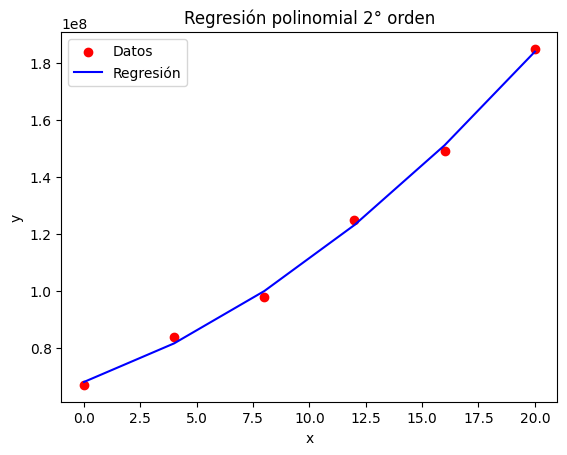

In [4]:
sum_x= sum(x)
sum_y = sum(y)
x2 = np.zeros(n)
x3 = np.zeros(n)
x4 = np.zeros(n)
xy = np.zeros(n)
x2y = np.zeros(n)

for i in range(n):
    x2[i] = x[i]**2
    x3[i] = x[i]**3
    x4[i] = x[i]**4
    xy[i] = x[i]*y[i]
    x2y[i] = (x[i]*x[i])*y[i]

x_prom = sum_x/n
y_prom = sum_y/n
sum_x2 = sum(x2)
sum_x3 = sum(x3)
sum_x4 = sum(x4)
sum_xy = sum(xy)
sum_x2y = sum(x2y)

print("\nDATOS: ")
print('{:^15}{:^15}{:^15}{:^15}'.format('x prom', 'y prom','Suma x', 'Suma y'))
print('{:^15,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}'.format(x_prom, y_prom, sum_x, sum_y))
print()
print('{:^15}{:^15}{:^22}{:^22}{:^22}'.format('Suma(x^2)', 'Suma(x^3)', 'Suma(x^4)', 'Suma(xy)', 'Suma(x^2y)'))
print('{:^15,.3f}{:^15,.3f}{:^22,.3f}{:^22,.1f}{:^22,.1f}'.format(sum_x2, sum_x3, sum_x4, sum_xy, sum_x2y))

#Cálculo para encontrar coeficientes a0 y a1:
a_1 = np.array([[n, sum_x, sum_x2],
              [sum_x, sum_x2, sum_x3],
              [sum_x2, sum_x3, sum_x4]])

b = np.array([[sum_y],[sum_xy], [sum_x2y]])

m = len(a_1)
a = np.concatenate((a_1,b),axis=1)
ar = gauss(a, m)
print("\nUTILIZANDO ELIMINACIÓN DE GAUSS: ")
print("La solución para a0, a1 y a2 es:")
print(ar)

#Cálculos para regresión:
print("\nREGRESIÓN POLINOMIAL:")
ycal = np.zeros(n)
y_ycal2 = np.zeros(n)
y_yprom = np.zeros(n)

print('{:^20}{:^10}{:^15}{:^20}{:^10}'.format('x', 'y', 'y cal', '(y-ycal)^2', '(y-yprom)^2'))
for i in range(n):
    ycal[i] = ar[0] + ar[1]*x[i] + ar[2]*x[i]*x[i]
    y_ycal2[i] = (y[i] - ycal[i])**2
    y_yprom[i] = (y[i]-y_prom)**2
    print('{:^20}{:^10}{:^15.6}{:^20.6}{:^10.6}'.format(x[i], y[i], ycal[i], y_ycal2[i], y_yprom[i]))
sum_ycal = sum(ycal)
sum_yycal2 = sum(y_ycal2)
sum_yyprom = sum(y_yprom)

print("Suma")
print('{:^20}{:^10}{:^15.6}{:^20.6}{:^10.6}'.format(sum_x, sum_y, sum_ycal ,sum_yycal2, sum_yyprom))

print("\nOtros datos: ")
Sr = sum_yycal2
St = sum_yyprom
Sxy = sqrt( Sr/(n - (o+1)) )
r2 = (St-Sr)/St
r = sqrt(r2) #Coeficiente de correlación
print("Sr = {:.4f} ".format(Sr))
print("St = {:.4f} ".format(St))
print("r^2 = {:.4f} ".format(r2))
print("Coeficiente de correlación r = {:.4f} ".format(r))
print("S x/y {:.4f}: ".format(Sxy))

ye= ycal
#Gráfica:
plt.title('Regresión polinomial 2° orden')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y, color='red', label = 'Datos')
plt.plot(x, ycal, '-', color='blue', label = 'Regresión')
plt.legend()
plt.show()

#Regresión polinomial 3° orden
El caso del polinomio anterior se extiende con facilidad a un polinomio de $m$-ésimo grado como sigue
\begin{equation}
y=a_0+a_1x+a_2x^2+...+a_mx^m+e
\end{equation}
para conocer los coeficientes del polinomio de grado superior equivale a resolver un sistema de ecuaciones de $m+1$ incógnitas.

In [5]:
# Datos:
x = np.array([0, 4, 8, 12, 16, 20])
y = np.array([67e6, 84e6, 98e6, 125e6, 149e6, 185e6])
n = len(x)
o = 3 # Orden del polinomio


DATOS: 
    x prom         y prom         Suma x         Suma y        Suma(x^2)      Suma(x^3)   
    10.000     118,000,000.000    60.000     708,000,000.000    880.000      14,400.000   

     Suma(x^4)           Suma(x^5)           Suma(x^6)            Suma(xy)           Suma(x^2y)          Suma(x^3y)     
     250624.000         4531200.000         84029440.000       8704000000.000     137760000000.000   2361856000000.000  

UTILIZANDO ELIMINACIÓN DE GAUSS: 
La solución para a0, a1, a2 y a3 es:
[6.72857143e+07 3.64285714e+06 3.34821429e+04 3.90625000e+03]

REGRESIÓN POLINOMIAL:
         x              y          y cal          (y-ycal)^2     (y-yprom)^2
         0          67000000.0  6.72857e+07      8.16327e+10     2.601e+15 
         4          84000000.0  8.26429e+07      1.84184e+12     1.156e+15 
         8          98000000.0  1.00571e+08      6.61224e+12       4e+14   
         12         125000000.0  1.22571e+08      5.89796e+12      4.9e+13  
         16         1490000

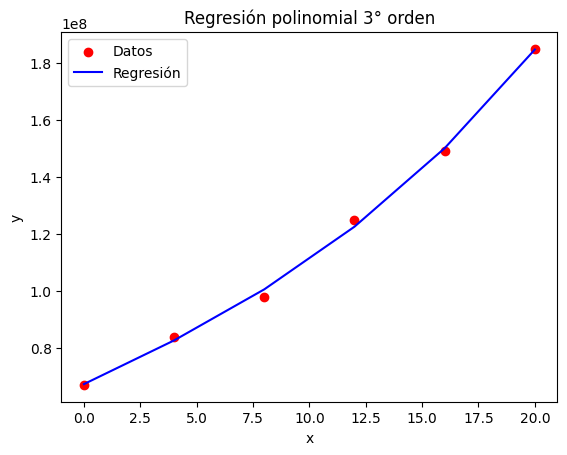

In [6]:
sum_x= sum(x)
sum_y = sum(y)
x2 = np.zeros(n)
x3 = np.zeros(n)
x4 = np.zeros(n)
x5 = np.zeros(n)
x6 = np.zeros(n)
xy = np.zeros(n)
x2y = np.zeros(n)
x3y = np.zeros(n)

for i in range(n):
    x2[i] = x[i]**2
    x3[i] = x[i]**3
    x4[i] = x[i]**4
    x5[i] = x[i]**5
    x6[i] = x[i]**6
    xy[i] = x[i]*y[i]
    x2y[i] = (x[i]*x[i])*y[i]
    x3y[i] = (x[i]*x[i]*x[i])*y[i]

x_prom = sum_x/n
y_prom = sum_y/n
sum_x2 = sum(x2)
sum_x3 = sum(x3)
sum_x4 = sum(x4)
sum_x5 = sum(x5)
sum_x6 = sum(x6)
sum_xy = sum(xy)
sum_x2y = sum(x2y)
sum_x3y = sum(x3y)

print("\nDATOS: ")
print('{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}'.format('x prom', 'y prom','Suma x', 'Suma y', 'Suma(x^2)', 'Suma(x^3)'))
print('{:^15,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}{:^15,.3f}'.format(x_prom, y_prom, sum_x, sum_y, sum_x2, sum_x3))
print()
print('{:^20}{:^20}{:^20}{:^20}{:^20}{:^20}'.format( 'Suma(x^4)',  'Suma(x^5)',  'Suma(x^6)', 'Suma(xy)', 'Suma(x^2y)', 'Suma(x^3y)'))
print('{:^20.3f}{:^20.3f}{:^20.3f}{:^20.3f}{:^20.3f}{:^20.3f}'.format( sum_x4, sum_x5,  sum_x6, sum_xy, sum_x2y, sum_x3y))


#Cálculo para encontrar coeficientes a0 y a1:
a_1 = np.array([[n, sum_x, sum_x2, sum_x3],
              [sum_x, sum_x2, sum_x3, sum_x4],
              [sum_x2, sum_x3, sum_x4, sum_x5],
                [sum_x3, sum_x4, sum_x5, sum_x6]])

b = np.array([[sum_y],[sum_xy], [sum_x2y], [sum_x3y]])

m = len(a_1)
a = np.concatenate((a_1,b),axis=1)
ar = gauss(a, m)
print("\nUTILIZANDO ELIMINACIÓN DE GAUSS: ")
print("La solución para a0, a1, a2 y a3 es:")
print(ar)

#Cálculos para regresión:
print("\nREGRESIÓN POLINOMIAL:")
ycal = np.zeros(n)
y_ycal2 = np.zeros(n)
y_yprom = np.zeros(n)

print('{:^20}{:^10}{:^15}{:^20}{:^10}'.format('x', 'y', 'y cal', '(y-ycal)^2', '(y-yprom)^2'))
for i in range(n):
    ycal[i] = ar[0] + ar[1]*x[i] + ar[2]*x[i]*x[i] +ar[3]*x[i]*x[i]*x[i]
    y_ycal2[i] = (y[i] - ycal[i])**2
    y_yprom[i] = (y[i]-y_prom)**2
    print('{:^20}{:^10}{:^15.6}{:^20.6}{:^10.6}'.format(x[i], y[i], ycal[i], y_ycal2[i], y_yprom[i]))
sum_ycal = sum(ycal)
sum_yycal2 = sum(y_ycal2)
sum_yyprom = sum(y_yprom)

print("Suma")
print('{:^20}{:^10}{:^15.6}{:^20.6}{:^10.6}'.format(sum_x, sum_y, sum_ycal ,sum_yycal2, sum_yyprom))

print("\nOtros datos: ")
Sr = sum_yycal2
St = sum_yyprom
Sxy = sqrt( Sr/(n - (o+1)) )
r2 = (St-Sr)/St
r = sqrt(r2) #Coeficiente de correlación
print("Sr = {:.4f} ".format(Sr))
print("St = {:.4f} ".format(St))
print("r^2 = {:.4f} ".format(r2))
print("Coeficiente de correlación r = {:.4f} ".format(r))
print("S x/y {:.4f}: ".format(Sxy))

yf= ycal
#Gráfica:
plt.title('Regresión polinomial 3° orden')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y, color='red', label = 'Datos')
plt.plot(x, ycal, '-', color='blue', label = 'Regresión')
plt.legend()
plt.show()